# Lab 3: Functions and Visualizations

## Due Tuesday, April 20, 11:59 pm 

Welcome to lab 3! This week, we'll learn about functions, table methods and visualization. The [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html) should be a great resource. This lab is due **Tuesday (4/20) at 11:59pm.**

First, set up the tests and imports by running the cell below.

In [1]:
import numpy as np
import babypandas as bpd
import math

# These lines set up graphing capabilities.
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import otter
grader = otter.Notebook()

## 1. Functions and CEO Incomes

Let's start with a real data analysis task.  We'll look at the 2015 compensation of CEOs at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies.  Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the data in raw form from the LA Times page into a file called `raw_compensation.csv`.  (The page notes that all dollar amounts are in millions of dollars.)

In [2]:
raw_compensation = bpd.read_csv('data/raw_compensation.csv').set_index('Rank')
raw_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
Rank,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000


**Question 1.1.** We want to compute the average of the CEOs' pay. Try running the cell below.

In [3]:
# after running this cell to see the error, you can prevent it from running again
# by placing a '#' in front of the line of code to "comment it out".
#raw_compensation.get("Total Pay").mean()

You should see an error. Let's examine why this error occured by looking at the values in the "Total Pay" column. Use the `type` function and set `total_pay_type` to the type of the first item from the "Total Pay" column.

In [4]:
total_pay_type = type(raw_compensation.get('Total Pay').iloc[0])
total_pay_type

str

In [5]:
grader.check("q11")

All tests passed!

**Question 1.2.** You should have found that the values in "Total Pay" column are strings (text). It doesn't make sense to take the average of the text values, so we need to convert them to numbers if we want to do this. Extract the first value in the "Total Pay" column.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [6]:
mark_hurd_pay_string = raw_compensation.get('Total Pay').iloc[0]
mark_hurd_pay_string

'$53.25 '

In [7]:
grader.check("q12")

All tests passed!

**Question 1.3.** Using code, `mark_hurd_pay_string` to a number of *dollars*.  The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  You'll also need the function `float`, which converts a string that looks like a number to an actual number.  Last, remember that the answer should be in dollars, not millions of dollars.

In [8]:
mark_hurd_pay = float(mark_hurd_pay_string.strip('$')) * 1000000
mark_hurd_pay

53250000.0

In [9]:
grader.check("q13")

All tests passed!

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab we'll see the payoff: we can call that function on every pay string in the dataset at once.

**Question 1.4.** Copy the expression you used to compute `mark_hurd_pay` as the `return` expression of the function below, but replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line of the `def` statement.

In [10]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    return float(pay_string.strip('$')) * 1000000

In [11]:
grader.check("q14")

All tests passed!

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert any string with the right format (like "$100") to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument, a string, and it returns a number.

In [12]:
convert_pay_string_to_number('$42')

42000000.0

In [13]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000.0

In [14]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.get('Total Pay').iloc[1])

53240000.0

What have we gained?  Well, without the function, we'd have to copy that `(10**6) * float(pay_string.strip("$"))` stuff **each time** we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every pay string in a single expression. First, let's write some more functions.

## 2. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many *arguments* your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so **you should write an explanation of what your function does**.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`. The return statement also *ends the function* and once it's called *no lines in the body after it are run*. So, we want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

**Question 2.1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion `0.2` to a percentage.  Name that percentage `twenty_percent`.

In [15]:
def to_percentage(proportion):
    """ Converts a proportion to a percentage """
    factor = 100
    return proportion * factor

In [16]:
grader.check("q211")

All tests passed!

In [17]:
twenty_percent = to_percentage(0.2)
twenty_percent

20.0

In [18]:
grader.check("q212")

All tests passed!

Like the built-in functions, you can use named values as arguments to your function.

**Question 2.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [19]:
a_proportion = 2**(.5) / 2

In [20]:
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

In [21]:
grader.check("q22")

All tests passed!

Here's something important about functions: the names assigned within a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, you cannot refer to `factor` anywhere except inside the body of `to_percentage`:

*Note:* Keep in mind that this cell intentionally causes an error if you want to use Run All! You can comment it out to prevent the error from happening again.

In [22]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.) You can comment this code out
# after running it to prevent the error in the future.
#factor

As we've seen with the built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 2.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  And you can call `replace` multiple times.

In [23]:
def disemvowel(a_string):
    return a_string.replace('a','').replace('e','').replace('i', '').replace('o', '').replace('u', '')
    
# An example call to your function. (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [24]:
grader.check("q23")

All tests passed!

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the sprinkles.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 2.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

In [25]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(a_string.replace('a','').replace('e','').replace('i', '').replace('o', '').replace('u', ''))

In [26]:
grader.check("q24")

All tests passed!

Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [27]:
movies_by_year = bpd.read_csv("data/movies_by_year.csv").set_index('Year')
rank = 5
fifth_from_top_movie_year = movies_by_year.sort_values(by='Total Gross', ascending=False).index[rank-1]

print("Year number", rank, "for total gross movie sales was", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was 2010


After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 2.5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement, because the function doesn't actually *return* anything.

In [28]:
def print_kth_top_movie_year(k):
    top_movie = movies_by_year.sort_values(by='Total Gross', ascending=False).index[k-1]
    print("Year number", k, "for total gross movie sales was", top_movie)

In [29]:
# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Year number 2 for total gross movie sales was 2013
Year number 3 for total gross movie sales was 2012


## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "the"!

For example, we can make a new name for the built-in function `max` if we want:

In [30]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [31]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [32]:
max

<function max>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [33]:
np.array([max, np.average, type])

array([<built-in function max>, <function average at 0x7ff3783f7b70>,
       <class 'type'>], dtype=object)

**Question 3.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

In [34]:
some_functions = np.array([min, sum, np.median])
some_functions

array([<built-in function min>, <built-in function sum>,
       <function median at 0x7ff378403510>], dtype=object)

In [35]:
grader.check("q31")

All tests passed!

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [36]:
np.array([max, np.average, type])[0](4, -2, 7)

7

Here's a simpler example that's actually useful: the table method `apply`.
`apply` calls a function many times, once on *each* element in a column of a table. It produces an array of the results.

Here's an example. Remember that the `"Total Pay"` column of the `raw_compensation` DataFrame had a bunch of strings:

In [37]:
raw_compensation.get("Total Pay")

Rank
1      $53.25 
2      $53.24 
3      $44.91 
4      $35.98 
5      $33.36 
        ...   
98      $0.94 
99      $0.81 
100     $0.07 
101     $0.04 
102     $0.00 
Name: Total Pay, Length: 102, dtype: object

We wrote a function, `convert_pay_string_to_number`, that converts one of these strings to a number.
Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [38]:
raw_compensation.get("Total Pay").apply(convert_pay_string_to_number)

Rank
1      53250000.0
2      53240000.0
3      44910000.0
4      35980000.0
5      33360000.0
          ...    
98       940000.0
99       810000.0
100       70000.0
101       40000.0
102           0.0
Name: Total Pay, Length: 102, dtype: float64

Here's an illustration of what that did:

<img src="data/apply.png"/>

Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 3.2.** Using `apply`, make a table that's a copy of `raw_compensation` with one more column called "Total_Pay_Dollars".  It should be the result of applying `convert_pay_string_to_number` to the "Total Pay" column, as we did above.  Call the new table `compensation`.

In [39]:
compensation = raw_compensation.assign(Total_Pay_Dollars = raw_compensation.get('Total Pay').apply(convert_pay_string_to_number))
compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars
Rank,,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000,53250000.0
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000,53240000.0
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0
...,...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000.0


In [40]:
grader.check("q32")

All tests passed!

Now that we have the pay in numbers, we can compute things about them.

**Question 3.3.** Compute the average total pay of the CEOs in the dataset.

In [41]:
average_total_pay = compensation.get('Total_Pay_Dollars').mean()
average_total_pay

11445294.11764706

In [42]:
grader.check("q33")

All tests passed!

**Question 3.4.** Companies pay executives in a variety of ways: directly in cash; by granting stock or other "equity" in the company; or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

In [43]:
def convert_cashpay_string_to_number(cashpay_string):
    return float(cashpay_string.strip('$')) * 1000000
compensation = compensation.assign(Cash_Pay_Dollars = compensation.get('Cash Pay').apply(convert_cashpay_string_to_number))
cash_proportion = (compensation.get('Cash_Pay_Dollars') / compensation.get('Total_Pay_Dollars'))
cash_proportion


Rank
1      0.017840
2      0.017844
3      0.554220
4      0.027793
5      0.139388
         ...   
98     0.989362
99     0.876543
100    0.000000
101    1.000000
102         NaN
Length: 102, dtype: float64

In [44]:
grader.check("q34")

All tests passed!

Look closely at the result. The last line has a strange-looking value, `NaN`. `NaN` stands for "not a number".

<img scale=50% src="data/nan.png"/>

Let's look at the last few lines of the table:

In [45]:
compensation.take(np.arange(-5,0))

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars,Cash_Pay_Dollars
Rank,,,,,,,,,,
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0,930000.0
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0,710000.0
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000.0,0.0
101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000.0,40000.0
102,Lawrence Page***,Alphabet (Mountain View),$0.00,0%,$0.00,$0.00,$0.00,0.00001,0.0,0.0


Notice anything strange? 

**Question 3.5.** Why did we get the `NaN`?  Assign either 1, 2, 3, or 4 to the name `apply_q5` below. 
1. The proportion would be 0.  Python decides that only nonzero numbers are worth calculating.
2. The `Ratio of CEO pay to average industry worker pay` rounds to 0, so Python knows something is strange.
3. The calculation is dividing by 0, so the result isn't a number.

In [46]:
apply_q5 = 3

In [47]:
grader.check("q35")

All tests passed!

A lot of real data is messy.  It might contain zeros, empty values, or `nan`'s (not-a-number) that we need to watch out for when performing calculations! 

Alright, back to our CEOs.  Check out the "% Change" column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the "Total Pay" column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is \\$100 this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$100}{1 + \frac{50}{100}}$, or around \$66.66.

**Question 3.6.** Create a new table called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called "Previous_Total_Pay".  That column should have each CEO's pay in 2014.

*Hint:* This question takes several steps, but each one is still something you've seen before.  Take it one step at a time, using as many lines as you need.  You can print out your results after each step to make sure you're on the right track.

*Hint 2:* You'll need to define a function to convert percentage strings, like `-15%`, to numbers.  You can do that just above your other code.

*Hint 3:* If you see an error saying "unsupported operand type(s) for +: 'int' and 'Series'", try switching the order of your operation. Instead of writing something like `1 + series`, write `series + 1`.

In [48]:
#- you can write code to perform intermediate steps here
def convert_percentage_string_to_number(s):
    return int(s.strip('%')) * 0.01

filtered_compensation = compensation[compensation.get('% Change') != '(No previous year)']
total_pay = filtered_compensation.get('Total Pay').apply(convert_pay_string_to_number)
pct_change = filtered_compensation.get('% Change').apply(convert_percentage_string_to_number)
prev_total_pay = total_pay / (pct_change + 1)

In [49]:
with_previous_compensation = filtered_compensation.assign(Previous_Total_Pay=prev_total_pay)
with_previous_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars,Cash_Pay_Dollars,Previous_Total_Pay
Rank,,,,,,,,,,,
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0,24890000.0,4.629897e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0,1000000.0,4.232941e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0,4650000.0,3.971429e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222.00000,24840000.0,12100000.0,2.587500e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183.00000,22040000.0,4310000.0,2.592941e+07
...,...,...,...,...,...,...,...,...,...,...,...
97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.53,-66%,$1.50,$0.00,$0.04,26.00000,1530000.0,1500000.0,4.500000e+06
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0,930000.0,1.056180e+06
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0,710000.0,8.709677e+05


In [50]:
grader.check("q36")

All tests passed!

**Question 3.7.** What was the average pay of these CEOs in 2014?

In [51]:
average_pay_2014 = with_previous_compensation.get('Previous_Total_Pay').mean()
average_pay_2014

11649176.115603436

In [52]:
grader.check("q37")

All tests passed!

## 4. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* to display more information about a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 4.1.** Make a histogram of the pay of the CEOs in `compensation`.

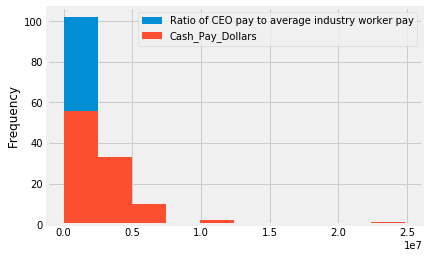

In [53]:
#- place your code here
compensation.plot(kind='hist', x='Total_Pay_Dollars')


**Question 4.2.** Looking at the histogram, about how many CEOs made more than \$30 million? Make a good guess. (Answer the question by filling in your answer manually.  You'll have to do a bit of arithmetic; feel free to use Python as a calculator.)

In [54]:
num_ceos_more_than_30_million = 0

**Question 4.3.** Answer the same question with code.

In [55]:
num_ceos_more_than_30_million_2 = compensation[compensation.get('Total_Pay_Dollars') >= 30000000].get('Total_Pay_Dollars').count()
num_ceos_more_than_30_million_2

5

In [56]:
grader.check("q43")

All tests passed!

Run the next cell if you want to see how far off you were.

In [57]:
percent_diff = abs(num_ceos_more_than_30_million - num_ceos_more_than_30_million_2) / num_ceos_more_than_30_million_2
print("Your guess was only", percent_diff * 100, "% off!")

Your guess was only 100.0 % off!


## 5. Google Play Store

In this problem, we will explore the [Google Play Store Apps Dataset](https://www.kaggle.com/lava18/google-play-store-apps), scraped from the Google Play Store.

In [58]:
# run this cell to load the data
apps = bpd.read_csv('data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10820,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education
10821,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education
10822,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical
10823,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


Each row in the table is an app. Here are descriptions of some of the columns.
- **Category** Category the app belongs to
- **Rating** Overall user rating of the app (as when scraped)
- **Reviews** Number of user reviews for the app (as when scraped) 
- **Installs** Number of user downloads/installs for the app (as when scraped)

Notice that we did not set the index, even though it looks like the app name would be a good candidate. This is because the app names are not unique! We can verify this with the help of a `numpy` function called `np.unique`. This function takes in an array and outputs an array with all duplicates removed.

We see above that the table has 10,825 rows. This means that there are 10,825 apps in the dataset. But let's calculate how many unique names there are:

In [59]:
len(np.unique(apps.get('App')))

9644

So there must be duplicates!

Because there are duplicates, the app name is not a good row label. In fact, there is no good row label in this case. In situations like this, we'll leave the index as-is.

**Question 5.1.** Assign `by_content` to a dataframe which counts the number of apps per Content Rating. List the Content Ratings alphabetically.

In [60]:
by_content = apps.groupby('Content Rating').count()
by_content

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
Content Rating,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3
Everyone,8702,8702,7420,8702,8702,8702,8702,8702,8702
Everyone 10+,413,413,397,413,413,413,413,413,413
Mature 17+,499,499,461,499,499,499,499,499,499
Teen,1206,1206,1084,1206,1206,1206,1206,1206,1206
Unrated,2,2,1,2,2,2,2,2,2


In [61]:
grader.check("q51")

All tests passed!

**Question 5.2.** Compute the number of apps in the dataset that have 1.5 stars or lower, and save the result in `bad_apps` and compute the number of apps in the dataset that have 4 stars or higher, and save the results in `good_apps`.

In [62]:
bad_apps = apps[apps.get('Rating') <= 1.5].shape[0]
bad_apps

23

In [63]:
grader.check("q521")

All tests passed!

In [64]:
good_apps = apps[apps.get('Rating') >= 4].shape[0]
good_apps

7368

In [65]:
grader.check("q522")

All tests passed!

**Question 5.3.** How many apps listed have the word "Google" (with that exact capitalization) in the App name? Save the number as `google_apps`.

Note: each row is a separate App and should be counted as such (even if the names are the same).

Hint: Section 6.2 in the textbook may help if you get stuck!

In [66]:
google_apps = apps[apps.get('App').str.contains('Google')].shape[0]
google_apps

94

In [67]:
grader.check("q53")

All tests passed!

**Question 5.4.** Of the apps under the Category `COMMUNICATION`, get the `Content Rating` count for apps where the Rating is between or equal to 4 and 5 (inclusive). Return this as a table sorted by `count` (with greatest count at the top of the table) called `top_communication_apps`.

Hint: creating two tables may help. Even though it is possible to do this in one line, sometimes it's better to break up the tasks to make the overall process clearer. We will only check the final table though.

In [68]:
#top_communication_apps = apps[(apps.get('Rating') >=4 ) & (apps.get('Rating') <= 5)].groupby('Category').sum()
top_communication_apps = apps[apps.get('Category') == 'COMMUNICATION']
top_communication_apps = top_communication_apps[(top_communication_apps.get('Rating') >=4 ) & 
                                                (top_communication_apps.get('Rating') <= 5)].groupby('Content Rating').count()
top_communication_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
Content Rating,,,,,,,,,
Everyone,238,238,238,238,238,238,238,238,238
Mature 17+,8,8,8,8,8,8,8,8,8
Teen,22,22,22,22,22,22,22,22,22


In [69]:
grader.check("q54")

All tests passed!

**Question 5.5.** Create a table named `install_stats` which has a single column, `Installs`, which contains the mean number of install of apps in each type of content rating.

In [70]:
installs = apps.groupby('Content Rating').mean()
install_stats = installs.drop(columns=['Rating','Reviews'])
install_stats

,Installs
Content Rating,
Adults only 18+,6.666667e+05
Everyone,1.311844e+07
Everyone 10+,3.204330e+07
Mature 17+,1.107112e+07
Teen,2.878636e+07
Unrated,2.525000e+04


In [71]:
grader.check("q55")

All tests passed!

**Question 5.6.** Suppose a good app is one with at least one million installs and a rating of at least 4.0. Create a variable called `best_category` containing the name of the category with the most good apps. 

In [72]:
best_category = apps[(apps.get('Rating') >= 4) & (apps.get("Installs") >= 1000000)].groupby('Category').count().get('App').sort_values(ascending=False).index[0]
best_category

'GAME'

In [73]:
grader.check("q56")

All tests passed!

**Question 5.7.** Make a bar chart of the average rating by category in which the bars are sorted from smallest to largest. Your result should look like this:

<img src="data/avg_rating_sorted.png"/>

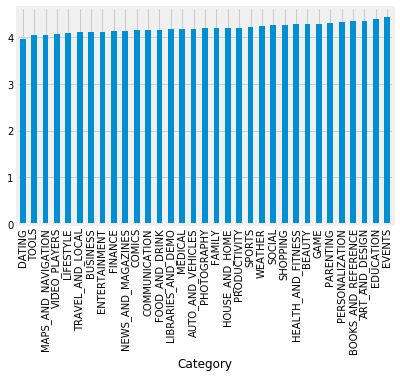

In [74]:
#- place your code here
ave_rating_cat = apps.groupby('Category').mean().get('Rating').sort_values().plot(kind='bar')
ave_rating_cat

# Finish Line

Congratulations! You are done with Lab 3.

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [75]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()